In [6]:

import numpy as np
import random
import matplotlib.pyplot as plt

def possion_generation(T,rate,dt): 
    import random
    t= 0

    spike = np.array([0 for _ in range(int(T/dt))]) #spike的位数和总步数一致，单位时间是一个步数
    while True:
        t+= random.expovariate(((rate*dt)/1000))#产生间隔，指数分布的参数lambda=rate/T。在这里的单位时间是dt/1000,因此，单位时间内发生的事件数目为rate*dt/1000
        if t>int(T/dt):
            break
        spike[int(t)]=1 
    return spike
def pulse(N_x,Time,dt,rate):
    pulse_=[]
    for i in range(N_x):
        pulse_.append(possion_generation(Time,rate,dt))
    pulse_=np.array(pulse_).T
    return pulse_

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

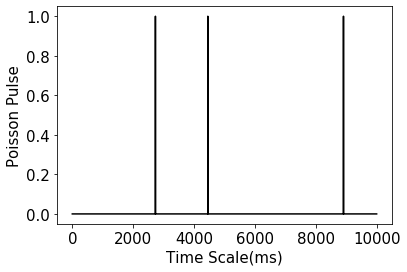

In [7]:
plt.plot(pulse(4,1000,0.1,5)[:,2],color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

In [8]:
def possion_generation2(T,rate,dt): 
    import random
    import math

    _lambda = rate*dt/1000
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    arrival=[]
    while True:
        p = random.random()
        _inter_arrival_time = -math.log(1.0 - p)/_lambda
        _arrival_time = _arrival_time + _inter_arrival_time
        if _arrival_time>int(T/dt):
            break
        arrival.append(int(_arrival_time))
    spike[(arrival)]=1
    plt.plot(spike[0:T])
    return spike

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

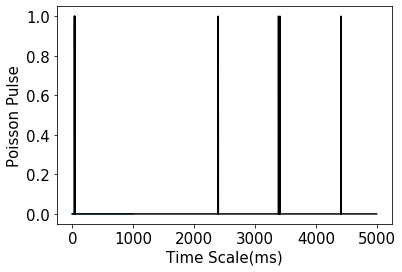

In [9]:
plt.plot(possion_generation2(1000,5,0.2),color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

In [10]:
def poisoon_generation3(T,rate,dt):
    time_all=[]
    _lambda=rate*dt/T
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    while True:
        t= random.gammavariate(i, 1000/(rate*dt))
        if t>int(T/dt):
            break
        time_all.append(int(t))
    spike[(time_all)]=1
    
    return spike


# Parameters

In [12]:
def time_calculating(t_,dt,time_,taub):
    N_ = np.array(time_)*1
    N_[np.where(N_==0)] = (t_+1)*1
    summ=np.sum(EB((t_-N_),taub,dt),axis=0)
    summ = (np.array(summ)).reshape(np.array(time_).shape[1],1)
    return summ
def EB(t,taub,dt):
    e = ((pow(np.e,(-t+dt)/taub)-pow(np.e,(-t)/taub)))*np.heaviside(t, 1)
    return np.array(e)

def current_calculation(t_,time_,taub): #time_是一个维度为time*neuron_number的矩阵
    N_ = np.array(time_)*1
    N_[np.where(N_==0)] = (t_+1)*1
    summ = np.sum(current_func((t_-N_),taub),axis=0)
    summ = (np.array(summ)).reshape(np.array(time_).shape[1],1)
    return summ
    

def current_func(t,taub):
    current = (pow(np.e,-t/taub)/taub)*np.heaviside(t, 1)
    return current




In [21]:
#Sparsely connected matrix
def EI_M(Number1,Number2,pr,J):
    matrix=np.zeros((Number1,Number2))
    matrix_p=np.random.rand(Number1,Number2)
    matrix[matrix_p<pr]=J
    return matrix


N=10000
N_e=int(N*0.8)
N_i=int(N*0.2)
N_x=N_i
Cm=1
G_L=Cm/15
E_L=-72
V_t=-50
V_r=-75
VT=-55
V_lb=-100
p=0.1
j_ei = -100*Cm
j_ee = 35*Cm
j_ie = 120*Cm
j_ii = -200*Cm
tref=2

J_ee=j_ee/np.sqrt(N_e); 
J_ie=j_ie/np.sqrt(N_e); 
J_ei=j_ei/np.sqrt(N_i); 
J_ii=j_ii/np.sqrt(N_i); 


J_exte=150*Cm/np.sqrt(N_x)
J_exti=120*Cm/np.sqrt(N_x); 
#J_ext=0.5:itdepends on the condition
#delay=1:Omit it first
DT=1

#connection matrices:
M_EE=EI_M(N_e,N_e,p,J_ee)
M_IE=EI_M(N_i,N_e,p,J_ie)
M_EI = EI_M(N_e,N_i,p,J_ei)
M_II =EI_M(N_i,N_i,p,J_ii)
J_EXEE=EI_M(N_e,N_i,p,J_exte)
J_EXII=EI_M(N_i,N_i,p,J_exti)

## The matrice to realize the rest-time.
def update_matrix1(M):  #更新函数  
    N=np.array(M)*1
    N[np.where(M>0)]=0
    N[np.where(M==0)]=1    
    return N
def update_matrix2(M,dt,rest):#使更新矩阵循环
    N=np.array(M)*1
    N[M>=((rest/dt)-1)]=0
    return N
def turn_2_zero(M):#使得矩阵被relu
    if M<0:
        return 0
    else:
        return M
    
    
## The matrix to initialize the voltage      
def randlc(N_x,up,down):
    import random
    rando=[]
    for i in range(N_x):
        rando.append(random.uniform(down,up))
    return np.array(rando).reshape(N_x,1)

## Updating：
$$
V_{j}^{a}(t)-V_{j}^{a}(t-1)=\frac{dt}{Cm}(-g_{L}\left(V_{j}^{a}-E_{L}\right)+D_{T} e^{\left(V_{j}^{a}-V_{T}\right) / D_{T}})+\int_{t-dt}^{t}T_{j}^{a}(t),\\
T_{j}^{a}(t)=E_{j}^{a}(t)+I_{j}^{a}(t)+X_{j}^{a}(t),\\
\int_{t-dt}^{t}T_{j}^{a}(t)=\sum_{b} \sum_{k} J_{j k}^{a b} \sum_{n} (e^{-t+dt / \tau_{b}}- e^{-t/ \tau_{b}})/ \tau_{b} H(t)
$$
## input:
$$
T_{j}^{a}(t)=E_{j}^{a}(t)+I_{j}^{a}(t)+X_{j}^{a}(t),\\
T_{j}^{a}(t)=\sum_{b} \sum_{k} J_{j k}^{a b} \sum_{n} \alpha_{b}\left(t-t_{k, n}^{b}\right)
$$
## where $\alpha_{b}(t)=e^{-t / \tau_{b}} / \tau_{b} H(t)$.

In [23]:
info_MEE = []
for i in range(M_EE.shape[1]):
    info_MEE.append((np.where(M_EE[:,i]!=0)[0])*1)
info_MEI = []
for i in range(M_EI.shape[1]):
    info_MEI.append(np.where(M_EI[:,i]!=0)[0]*1)
info_MIE = []
for i in range(M_IE.shape[1]):
    info_MIE.append(np.where(M_IE[:,i]!=0)[0]*1)
info_MII=[]
for i in range(M_II.shape[1]):
    info_MII.append(np.where(M_II[:,i]!=0)[0]*1)
info_Je = []
for i in range(J_EXEE.shape[1]):
    info_Je.append(np.where(J_EXEE[:,i]!=0)[0]*1)
info_Ji = []
for i in range(J_EXII.shape[1]):
    info_Ji.append(np.where(J_EXII[:,i]!=0)[0]*1)

In [25]:
def time_interaction(dt,T,tau_e,tau_i,tau_x):
    max_pic=int(T/dt)
    pulse_=pulse(N_i,T,dt,10)
    V_e=randlc(N_e,V_t,V_r)
    V_i=randlc(N_i,V_t,V_r)
    
    V_e_all=[]
    V_i_all=[]
    
    Ve_count=np.zeros((N_e,1))
    Vi_count=np.zeros((N_i,1))
    
    current_i=[]
    current_e=[]
    Total_spike_e=[]
    Total_spike_i = []
    
    spiketime_pulse=[]
    
    possin_e = []
    possin_i=[]
    for t in np.linspace(dt,T,max_pic):
        
        Ve_count=update_matrix2(Ve_count,dt,tref)
        Vi_count=update_matrix2(Vi_count,dt,tref)
        
        V_e_all.append((V_e)*1)
        V_i_all.append((V_i)*1)
        
        
        spick_num_ie=np.zeros((N_i,1))
        spick_num_ii=np.zeros((N_i,1))
                
        spick_num_ee=np.zeros((N_e,1))
        spick_num_ei=np.zeros((N_e,1))
        
        spick_num_Jexte=np.zeros((N_e,1))
        spick_num_Jexti=np.zeros((N_i,1))
        
        current_num_e = np.zeros((N_e,1))
        current_num_i = np.zeros((N_e,1))
        
        spike_time_e = np.zeros((N_e,1))
        spike_time_i = np.zeros((N_i,1))
        

        
        index_spike_e=(np.where(V_e>=V_t))[0]
        spike_time_e[index_spike_e] = t*1 
        possin_e.append(np.squeeze(spike_time_e)*1)
        spiketime=possin_e[-int(20*tau_e/dt):] 
        ever_spike_e=np.where(np.sum(spiketime,axis=0)>0)[0]
        
       
        
        index_spike_i=(np.where(V_i>=V_t))[0]
        spike_time_i[index_spike_i] =t*1
        possin_i.append(np.squeeze(spike_time_i)*1)
        spiketimei = possin_i[-int(20*tau_i/dt):]
        ever_spike_i=np.where(np.sum(spiketimei,axis=0)>0)[0]
        
        E_sum = time_calculating(t,dt,np.array(spiketime)[:,ever_spike_e],tau_e)
        I_sum = time_calculating(t,dt,np.array(spiketimei)[:,ever_spike_i],tau_i)
        
        
        E_current =  current_calculation(t,np.array(spiketime)[:,ever_spike_e],tau_e)
        I_current = current_calculation(t,np.array(spiketimei)[:,ever_spike_i],tau_i)
        
        if len(index_spike_e)>0:
            V_e[index_spike_e]=V_r
        if len(index_spike_i)>0:
            V_i[index_spike_i]=V_r 
        if len(ever_spike_e)>0:
            for j in range(len(ever_spike_e)):
                numee_index=np.array(info_MEE[ever_spike_e[j]])
                spick_num_ee[(numee_index)] = spick_num_ee[numee_index]+E_sum[j]          
                current_num_e[(numee_index)] = current_num_e[(numee_index)] + J_ee*E_current[j]
                numie_index = np.array(info_MIE[ever_spike_e[j]])
                spick_num_ie[(numie_index)] = spick_num_ie[numie_index]+E_sum[j] 
        
        if len(ever_spike_i)>0:  
            for i in range(len(ever_spike_i)):
                numei_index=np.array(info_MEI[ever_spike_i[i]])
                spick_num_ei[(numei_index)] = spick_num_ei[numei_index]+I_sum[i]     
                current_num_i[(numei_index)] = current_num_i[(numei_index)] + J_ei*I_current[i]
                numii_index=np.array(info_MII[ever_spike_i[i]]) 
                spick_num_ii[(numii_index)] = spick_num_ii[(numii_index)]+I_sum[i]
        
        pulse_now =np.where(np.sum(pulse_[0:int(t/dt-1)],axis=0)>0)[0] 
        spiketime_pulse.append(np.squeeze((pulse_[int(t/dt-1):int(t/dt)])*t)*1) 
        Ext_sum = time_calculating(t,dt,np.array(spiketime_pulse)[:,pulse_now],tau_x)
        Current_ext = current_calculation(t,np.array(spiketime_pulse)[:,pulse_now],tau_x)
        if len(pulse_now)>0:  
            for k in range(len(pulse_now)):
                numje_index=np.array(info_Je[pulse_now[k]])                 
                spick_num_Jexte[(numje_index)] =  spick_num_Jexte[numje_index]+ Ext_sum[k]
                current_num_e[(numje_index)] = current_num_e[(numje_index)] + J_exte*Current_ext[k]
                numji_index=np.array(info_Ji[pulse_now[k]]) 
                spick_num_Jexti[(numji_index)] = spick_num_ii[(numji_index)] + Ext_sum[k]
        
       
        list_e=(list(np.where(Ve_count>0)[0])+list(index_spike_e))
        list_i=(list(np.where(Vi_count>0)[0])+list(index_spike_i))

        Ve_count[list_e] = Ve_count[list_e]+1
        Vi_count[list_i] = Vi_count[list_i]+1
        V_e = V_e +((J_ee*spick_num_ee+J_ei*spick_num_ei+J_exte*spick_num_Jexte))*(1/Cm)*update_matrix1(Ve_count)
        V_i = V_i*1+ (J_ie*spick_num_ie+J_ii*spick_num_ii+J_exti*spick_num_Jexti)*(1/Cm)*update_matrix1(Vi_count)

        V_e = V_e+((dt/Cm)*(-G_L*(V_e-E_L)+DT*pow(np.e,((V_e-VT)/DT))))*update_matrix1(Ve_count)
        V_i = V_i+((dt/Cm)*(-G_L*(V_i-E_L)+DT*pow(np.e,((V_i-VT)/DT))))*update_matrix1(Vi_count)
        V_e[V_e<V_lb]=V_lb  
        V_i[V_i<V_lb]=V_lb 
        current_e.append(current_num_e*1)
        current_i.append(current_num_i*1)
        Total_spike_e.append(len(index_spike_e)*1)
        Total_spike_i.append(len(index_spike_i)*1)
        print(t)
        print(len(index_spike_e))
    
    return possin_e,possin_i,Total_spike_e,Total_spike_i
            
            

In [ ]:
possin_e,possin_i,Total_spike_e,Total_spike_i= time_interaction(0.1,1000,8,4,10)

In [27]:
def interval(time_mat):
    interval = []
    for i in range(np.array(time_mat).shape[1]):
        temp =sorted((set(list(np.array(time_mat)[:,i]))),reverse = False)
        if len(temp)>1:
            for j in range(len(temp)-2):
                interval.append(temp[j+2]-temp[j+1])
    return interval

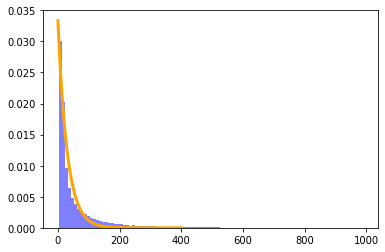

In [37]:
#distribution of time intervals
plt.hist(inter_400, 100, density=1, facecolor='blue', alpha=0.5) 
tau = 30


lam = 1 / tau
x = np.arange(0,400,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)
plt.show()

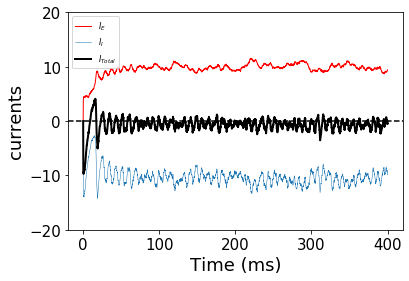

In [145]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

number=7
xx=np.linspace(0,(400-0.1),int(400/0.1))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

NEURON =4
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(xx,fit1,color = 'red',linewidth=1,label=r'$I_E$')
plt.plot(xx,fit2,linewidth=0.5,label=r'$I_I$')
plt.plot(xx,fit3,color='black',linewidth=2,label='$I_{Total}$')
plt.ylim(-20,20)

plt.xlabel('Time (ms)',fontdict={'size'   : 18})
plt.ylabel('currents',fontdict={'size'   : 18})
# ax1.axhline(y=-52, color='red', linestyle='--')
plt.tick_params(labelsize=15) 
plt.legend(fontsize=8)
plt.savefig('currents2.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()

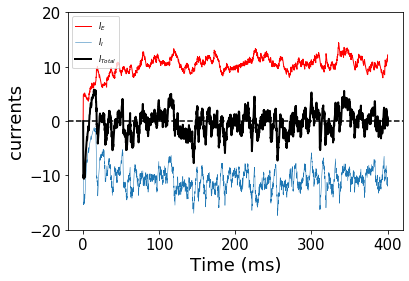

In [146]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

number=7
xx=np.linspace(0,(400-0.1),int(400/0.1))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

NEURON =4
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(xx,(np.array(np.squeeze(current_e))[-4000:,NEURON]),color = 'red',linewidth=1,label=r'$I_E$')
plt.plot(xx,(np.array(np.squeeze(current_i))[-4000:,NEURON]),linewidth=0.5,label=r'$I_I$')
plt.plot(xx,(np.array(np.squeeze(current_i))[-4000:,NEURON])+(np.array(np.squeeze(current_e))[-4000:,NEURON]),color='black',linewidth=2,label='$I_{Total}$')
plt.ylim(-20,20)

plt.xlabel('Time (ms)',fontdict={'size'   : 18})
plt.ylabel('currents',fontdict={'size'   : 18})
# ax1.axhline(y=-52, color='red', linestyle='--')
plt.tick_params(labelsize=15) 
plt.legend(fontsize=8)

plt.savefig('currents.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()

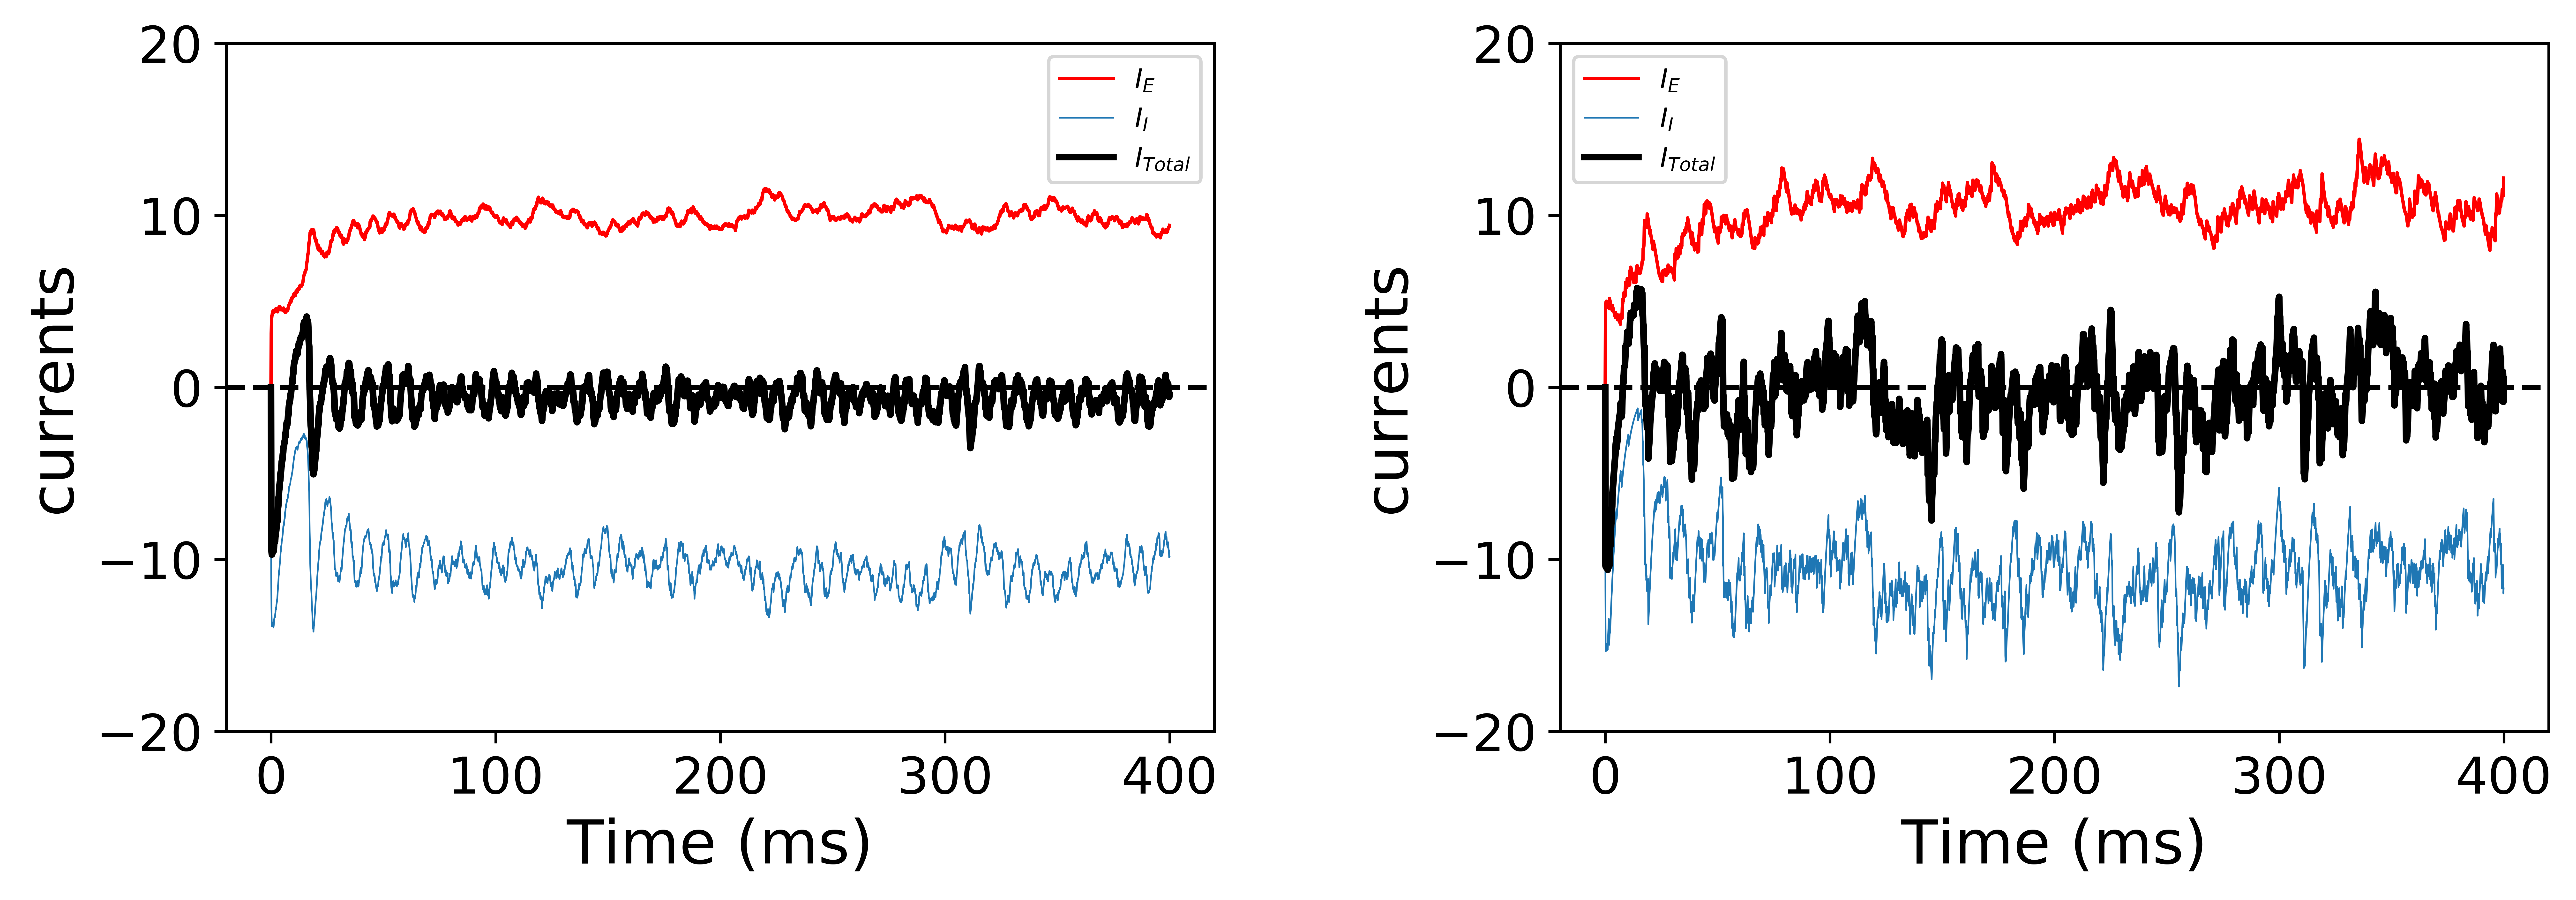

In [149]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

fig = plt.figure(num=2, figsize=(12,8),dpi=1000)
subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.25,wspace=0.35)
#使用add_subplot在窗口加子图，其本质就是添加坐标系
#三个参数分别为：行数，列数，本子图是所有子图中的第几个，最后一个参数设置错了子图可能发生重叠
ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2)
number=7
xx=np.linspace(0,(400-0.1),int(400/0.1))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8


ax1.axhline(y=0, color='black', linestyle='--')
ax1.plot(xx,fit1,color = 'red',linewidth=1,label=r'$I_E$')
ax1.plot(xx,fit2,linewidth=0.5,label=r'$I_I$')
ax1.plot(xx,fit3,color='black',linewidth=2,label='$I_{Total}$')
ax1.set_ylim(-20,20)

ax1.set_xlabel('Time (ms)',fontdict={'size'   : 18})
ax1.set_ylabel('currents',fontdict={'size'   : 18})
# ax1.axhline(y=-52, color='red', linestyle='--')
ax1.tick_params(labelsize=15) 
ax1.legend(fontsize=8)

NEURON =4
ax2.axhline(y=0, color='black', linestyle='--')
ax2.plot(xx,(np.array(np.squeeze(current_e))[-4000:,NEURON]),color = 'red',linewidth=1,label=r'$I_E$')
ax2.plot(xx,(np.array(np.squeeze(current_i))[-4000:,NEURON]),linewidth=0.5,label=r'$I_I$')
ax2.plot(xx,(np.array(np.squeeze(current_i))[-4000:,NEURON])+(np.array(np.squeeze(current_e))[-4000:,NEURON]),color='black',linewidth=2,label='$I_{Total}$')
ax2.set_ylim(-20,20)

ax2.set_xlabel('Time (ms)',fontdict={'size'   : 18})
ax2.set_ylabel('currents',fontdict={'size'   : 18})
# ax1.axhline(y=-52, color='red', linestyle='--')
ax2.tick_params(labelsize=15) 
ax2.legend(fontsize=8)
plt.savefig('currents3.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()

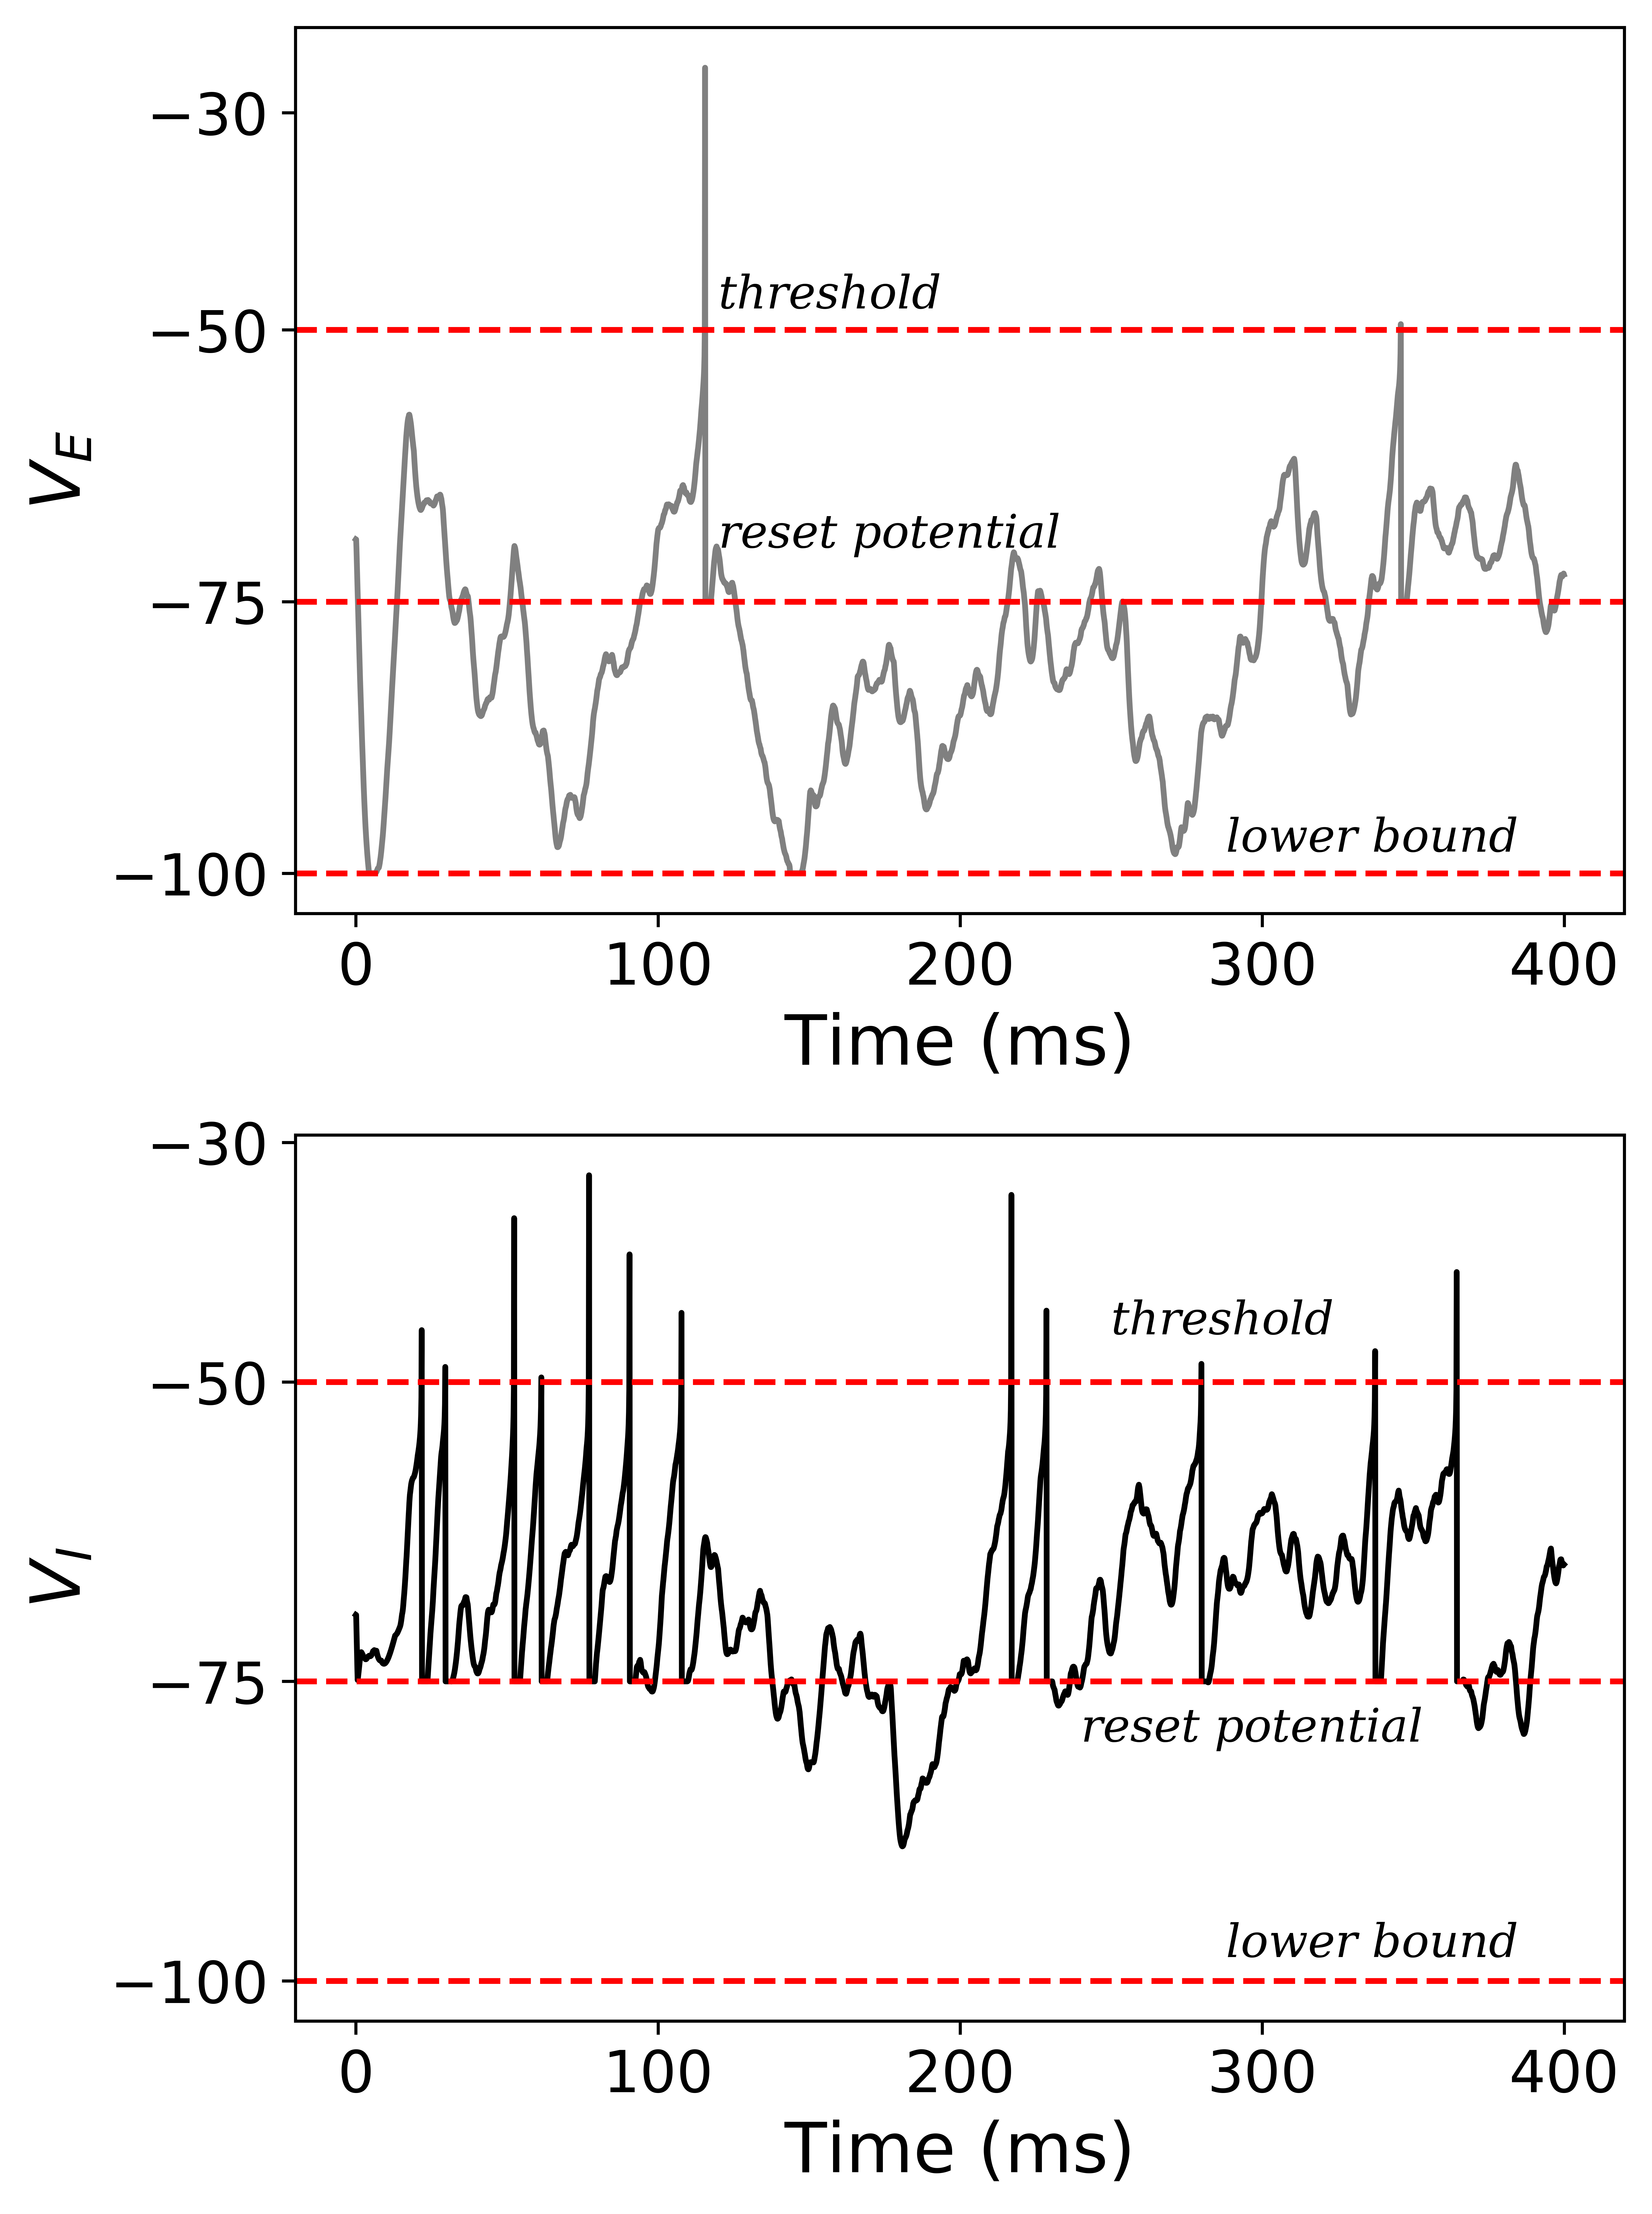

In [89]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

fig = plt.figure(num=2, figsize=(6,9),dpi=1000)
subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.25,wspace=0.35)
#使用add_subplot在窗口加子图，其本质就是添加坐标系
#三个参数分别为：行数，列数，本子图是所有子图中的第几个，最后一个参数设置错了子图可能发生重叠
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2)
number=7
xx=np.linspace(0,(400-0.1),int(400/0.1))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1.set_yticks([-100, -75, -50, -30])

ax1.plot(xx,np.squeeze(V_e_all)[:,4],color='grey')

ax1.set_xlabel('Time (ms)',fontdict={'size'   : 18})
ax1.set_ylabel(r'$V_E$',fontdict={'size'   : 18})
ax1.tick_params(labelsize=15) 
ax1.axhline(y=-50, color='red', linestyle='--')
ax1.axhline(y=-75, color='red', linestyle='--')
ax1.axhline(y=-100, color='red', linestyle='--')

ax2.plot(xx,np.squeeze(V_i_all)[:,4],color='black')


ax2.set_xlabel('Time (ms)',size=18)
ax2.set_ylabel(r'$V_I$',fontdict={'size'   : 18})
ax2.axhline(y=-50, color='red', linestyle='--')
ax2.axhline(y=-75, color='red', linestyle='--')
ax2.axhline(y=-100, color='red', linestyle='--')
ax2.tick_params(labelsize=15) 
ax1.text(288, -98, 'lower bound',fontsize=12, family='serif', style='italic')
ax2.text(288, -98, 'lower bound',fontsize=12, family='serif', style='italic')
ax1.text(120, -70, 'reset potential',fontsize=12, family='serif', style='italic')
ax1.text(120, -48, 'threshold',fontsize=12, family='serif', style='italic')
ax2.text(240, -80, 'reset potential',fontsize=12, family='serif', style='italic')
ax2.text(250, -46, 'threshold',fontsize=12, family='serif', style='italic')
ax2.set_yticks([-100, -75, -50, -30])

plt.savefig('membrane.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()